In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

#### Данные

In [2]:
data_month=pd.read_excel('data_case.xlsx',sheet_name='month')
data_quarter=pd.read_excel('data_case.xlsx',sheet_name='quarter')
descriptions=pd.read_excel('data_case.xlsx',sheet_name='description')

#### Таргеты

In [15]:
targets=pd.DataFrame({'period':data_month.period[1:],'target':data_month.target[1:]})
targets['first_abs_diff']=data_month['target'][1:].values-data_month['target'][0:-1].values
targets['delta']=((data_month['target'][1:].values/data_month['target'][0:-1].values)-1)*100

#### Удаляем тренды

In [42]:
# Добавляем t и t2
targets['t']=range(1,len(targets)+1)
targets['t2']=targets['t']*targets['t']
# Строим регрессии
model_1=LinearRegression().fit(X=targets['t'].values.reshape(-1,1),y=targets['target'].values.reshape(-1,1))
model_2=LinearRegression().fit(X=targets[['t','t2']],y=targets['target'].values.reshape(-1,1))
# Очищаем от тренда
targets['res_1']=targets['target'].values.reshape(-1,1)-model_1.predict(targets['t'].values.reshape(-1,1))
targets['res_2']=targets['target'].values.reshape(-1,1)-model_2.predict(targets[['t','t2']])

#### Графики

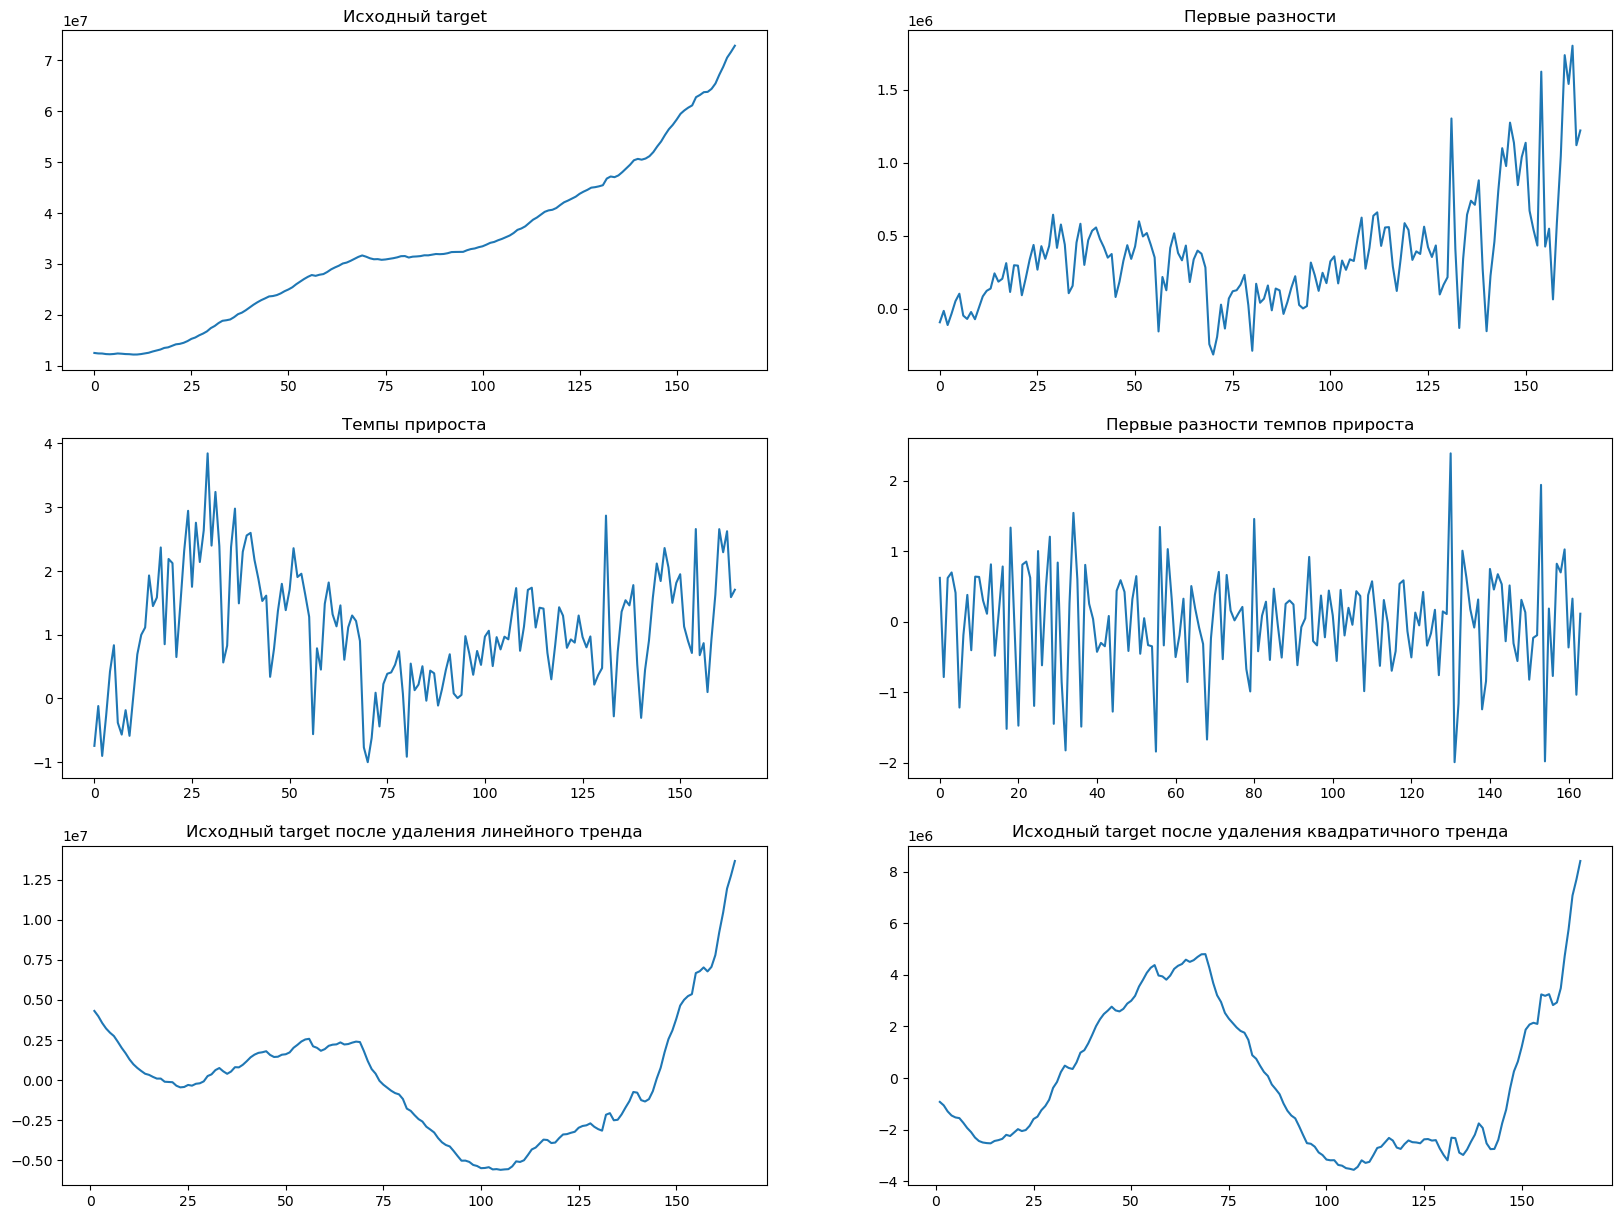

In [57]:
fig, axs = plt.subplots(3, 2,figsize=(20,15))
# График 1
axs[0, 0].plot(data_month['target'])
axs[0, 0].set_title('Исходный target')
# График 2
axs[0, 1].plot(data_month['target'][1:].values-data_month['target'][0:-1].values)
axs[0, 1].set_title('Первые разности')
# График 3
axs[1, 0].plot(((data_month['target'][1:].values/data_month['target'][0:-1].values)-1)*100)
axs[1, 0].set_title('Темпы прироста')
# График 4
axs[1, 1].plot(targets['delta'][1:].values-targets['delta'][0:-1].values)
axs[1, 1].set_title('Первые разности темпов прироста')
# График 5
axs[2, 0].plot(targets['res_1'])
axs[2, 0].set_title('Исходный target после удаления линейного тренда')
# График 6
axs[2, 1].plot(targets['res_2'])
axs[2, 1].set_title('Исходный target после удаления квадратичного тренда')
plt.show()